In [11]:
a = [1,2,3]
print(id(a))
a[2] = 10
print(id(a))

x = {1,2,3}
print(id(x))

1781732334536
1781732334536
1781732096040


In [13]:
s = 'abc'
print(id(s))

s = 'kbc'
print(id(s))



1781689913456
1781732175536


In [18]:
a=[1,2,3]

b=a # 얕은복사 :b에 a를 할당하게 되면 값이 할당되는 것이 아니라 메모리 주소를 공유
print(id(a))
print(id(b))

b[0] = 10
print(a)
print(b)

1781731568712
1781731568712
[10, 2, 3]
[10, 2, 3]


In [21]:
a='abc'
b=a
print(id(a))
print(id(b))

b='edf'

print(id(a))
print(id(b))
# 문자열의 경우에는 다른 값을 할당하면 메모리 주소에 재할당이 이루어짐!

1781689913456
1781689913456
1781689913456
1781733006640


In [25]:
a = [1,2,3]
b=a

print(id(a))
print(id(b))  # 같음

print(a is b) # 메모리 상에 주소가 동일
print(a==b)   # 두 변수에 저장되어 있는 값을 비교

a = [1,2,3]
b=a[:]
print(id(a))
print(id(b))  # 다름

print(a is b) # False  
print(a==b)  # True

1781733063560
1781733063560
True
True
1781733060680
1781731581512
False
True


In [27]:
a = [[1,2],[3,4]]
print(id(a))
print(id(a[0]))
print(id(a[1]))

1781733060936
1781731581896
1781733060808


# Copy




In [42]:
# 깊은 복사 (Deep Copy)
# 내부 객체들이 서로 복사
import copy
a =[[1,2],[3,4]]
b=a
print(id(a))
print(id(b)) # 같음 

print(id(a[0]))
print(id(b[0])) # 같음 

a[1]= [5,6]
print(a)
print(b)

a[1].append(9)
print(a)
print(b)  # 주소를 공유하기 때문에 같은 결과가 나옴

a =[[1,2],[3,4]]
b=copy.deepcopy(a)
a[1].append(5)
print(a)
print(b)
print(id(a))
print(id(b))  # 주소가 다름

1781746909640
1781746909640
1781751588488
1781751588488
[[1, 2], [5, 6]]
[[1, 2], [5, 6]]
[[1, 2], [5, 6, 9]]
[[1, 2], [5, 6, 9]]
[[1, 2], [3, 4, 5]]
[[1, 2], [3, 4]]
1781752573000
1781757359560


In [53]:
a=['test']
b = a # 값을 복사하는 것이 아님, 위치참조
print(id(a),id(b))

a is b
a.append('data')
a
b
# 참조하는 형태로 정의하였으므로, 주소가 공유

# copy모듈로 값 복사 : 얕은, 깊은 복사
import copy
myList = ['first',['second']]
# 얕은복사 (copy)
# 깊은복사 (deep copy)

cp = copy.copy(myList)
print(cp)
dp = copy.deepcopy(myList)
print(dp)

print(id(myList),id(cp),id(dp)) # 44 96 08 // id 모두 다름
print(id(myList[1]),id(cp[1]),id(dp[1]))  # 00 00 68 // copy함수는 원본 리스트와 같은 위치 참조

1781755513480 1781755513480
['first', ['second']]
['first', ['second']]
1781755290888 1781755513224 1781754858952
1781754857480 1781754857480 1781754858760


In [54]:
a = b # 복사 X 참조 O
a = copy.copy(b)  # 얕은 복사 = a=b[:]
a = copy.deepcopy(b)  # 깊은 복사

In [55]:
import numpy as np
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
from pandas import DataFrame
from numpy import NaN, nan, NAN
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
train = pd.read_csv('train2.csv', parse_dates=['datetime'])
# train.info()
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# EDA

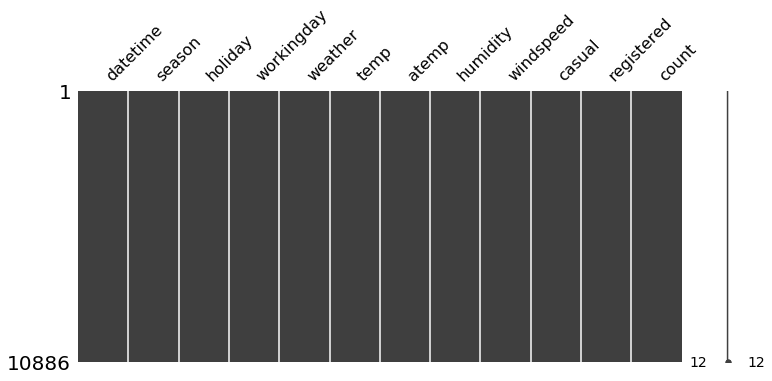

In [4]:
# 기술통계
train.describe()
train.temp.describe()

# 컬럼별 결측값 개수 파악
train.isnull().sum()

import missingno as msno
msno.matrix(train, figsize=(12,5))  # 결측치가 있는지를 그래프로 확인

In [5]:
# datetime 타입의 값 추출
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


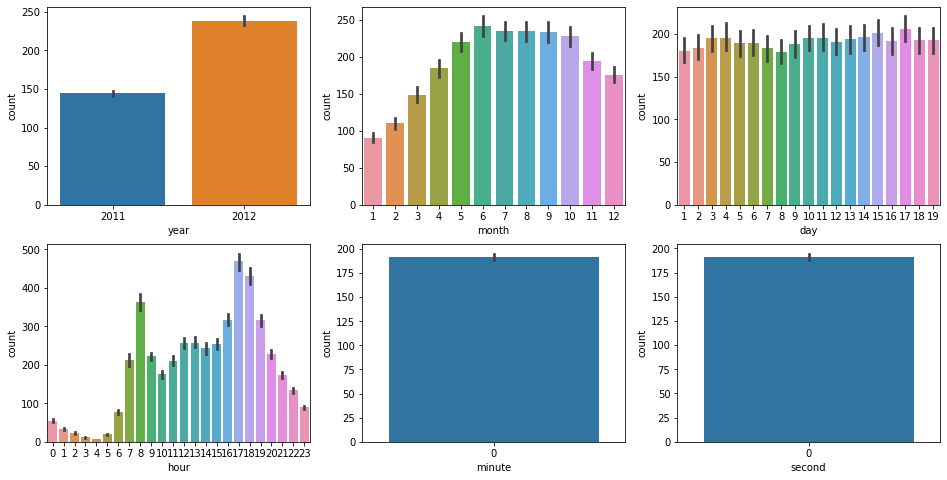

In [6]:
# barplot
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(16,8) 
sns.barplot(data = train, x='year', y ='count', ax = ax1)
sns.barplot(data = train, x='month', y ='count', ax = ax2)
sns.barplot(data = train, x='day', y ='count', ax = ax3)
sns.barplot(data = train, x='hour', y ='count', ax = ax4)
sns.barplot(data = train, x='minute', y ='count', ax = ax5)
sns.barplot(data = train, x='second', y ='count', ax = ax6)

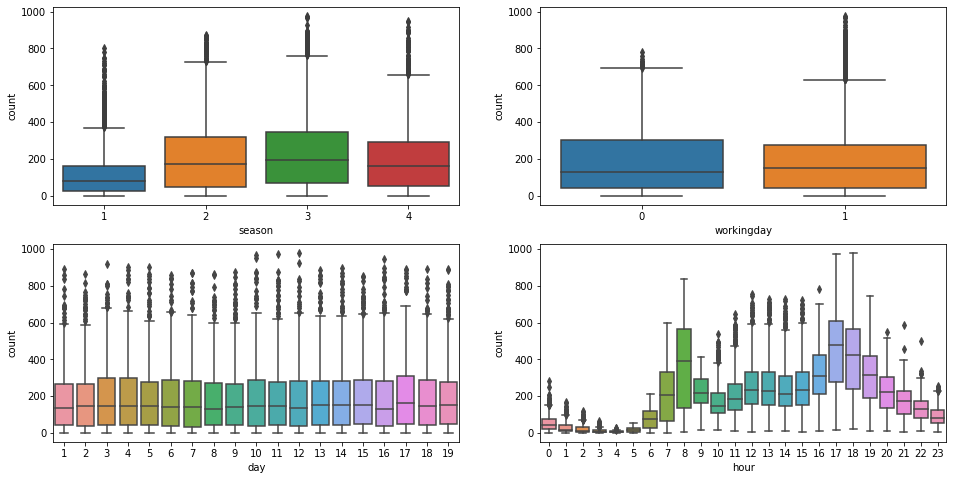

In [7]:
# boxplot
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(16,8) 
sns.boxplot(data = train, x='season', y ='count', ax = axes[0][0])
sns.boxplot(data = train, x='workingday', y ='count', ax = axes[0][1])
sns.boxplot(data = train, orient='ㅍ', x='day', y ='count', ax = axes[1][0])
sns.boxplot(data = train, x='hour', y ='count', ax = axes[1][1])
# 선 밖에 있는 점들이 이상치

In [8]:
train['dayofweek'] = train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [9]:
train['dayofweek'].unique()
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

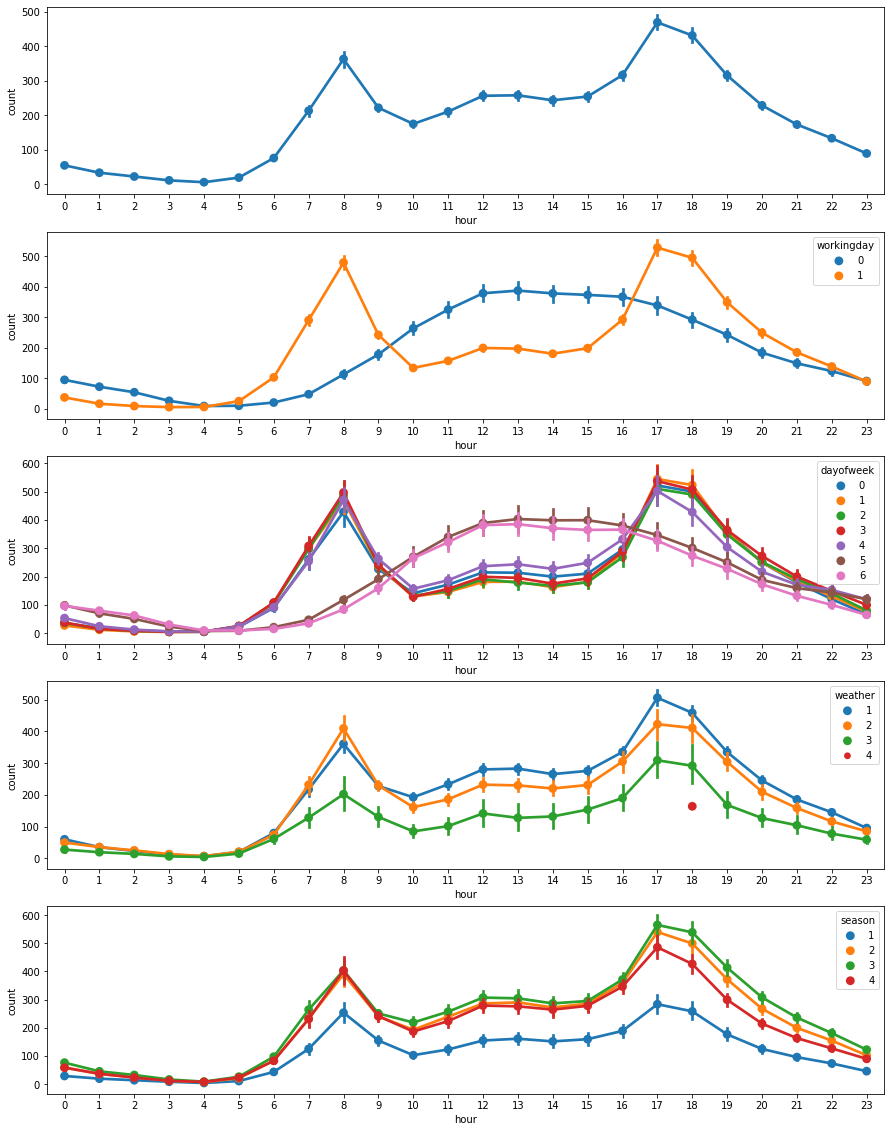

In [10]:
fig, (ax1,ax2,ax3, ax4, ax5) = plt.subplots(nrows = 5)
fig.set_size_inches(15,20)
sns.pointplot(data=train, x = 'hour', y='count', ax=ax1)
sns.pointplot(data=train, x = 'hour', y='count', hue='workingday', ax=ax2)
sns.pointplot(data=train, x = 'hour', y='count', hue='dayofweek', ax=ax3)
sns.pointplot(data=train, x = 'hour', y='count', hue='weather', ax=ax4)
sns.pointplot(data=train, x = 'hour', y='count', hue='season', ax=ax5)

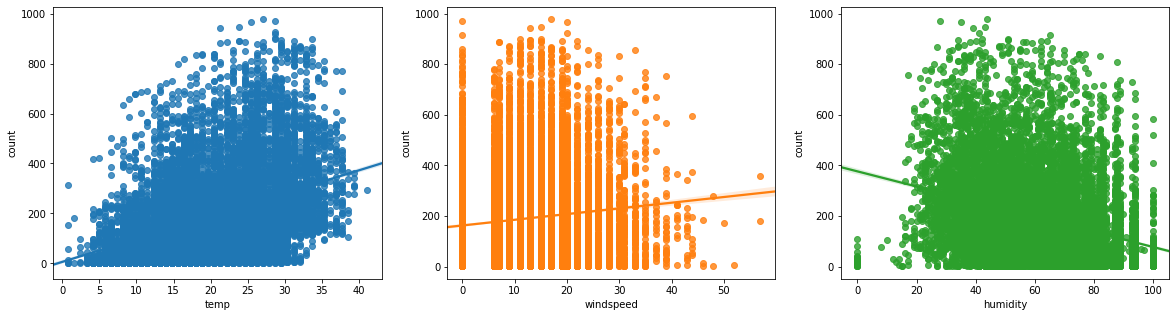

In [11]:
fig,(ax1,ax2,ax3)=plt.subplots(ncols=3)
fig.set_size_inches(20,5)
sns.regplot(x='temp',y='count',data=train, ax=ax1)
sns.regplot(x='windspeed',y='count',data=train, ax=ax2)
sns.regplot(x='humidity',y='count',data=train, ax=ax3)

In [12]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [13]:
# train['year_month'] = train['datetime']
# train['datetime']
def ym(mydt) :
    return'{0}-{1}'.format(mydt.year,mydt.month)
    
train['year_month'] = train['datetime'].apply(ym)  # datetime의 값이 하나하나 ym함수로 넘어감
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,year_month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5,2011-1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5,2011-1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5,2011-1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5,2011-1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5,2011-1


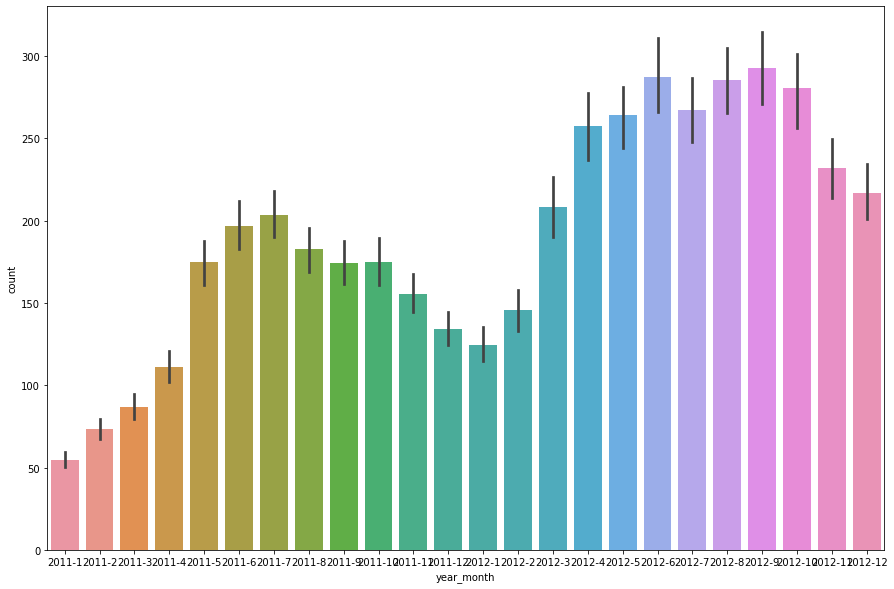

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(15,10)
sns.barplot(data=train, x='year_month', y='count',ax=axes)

In [15]:
# 이상치 제거
trainWithoutOutliers=train[np.abs(train['count'] - train['count'].mean()) <= (train['count'].std()*3)]
print(train.shape)
trainWithoutOutliers.shape

NameError: name 'np' is not defined

In [ ]:
# train 풍속 = 0
train['windspeed'].mean()
# loc로 0값 대체
# train.loc[train['windspeed']==0,'windspeed'] = train['windspeed'].mean()
train.loc[train['windspeed']!=0,'windspeed']

In [ ]:
trainWind0 = train.loc[train['windspeed']==0,'windspeed']
trainWindNot0 = train.loc[train['windspeed']!=0,'windspeed']

print(trainWind0.shape)
print(trainWindNot0.shape)

In [16]:
# 머신러닝의 랜덤포레스트로 풍속 예측
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    # data의 windspeed값이 0인 데이터를 rf를 이용하여 예측한 값으로 대체
    
    # 퐁속 예측에 사용되는 변수
    wCol = ['season','weather','humidity', 'temp', 'year', 'atemp']
    
    # 풍속이 0인것과 아닌것으로 구분
    dataWind0 = data.loc[data['windspeed']==0]
    dataWindNot0 = data.loc[data['windspeed']!=0]
    
    # 랜덤포레스트 분류기 생성
    rfModel = RandomForestClassifier()
    
    # Classifier를 사용하기 위해선 타입이 str이여야함
    dataWindNot0['windspeed'] = dataWindNot0['windspeed'].astype('str')
    
    # wCol -> 풍속 학습 -> 모델 완성
    rfModel.fit(dataWindNot0[wCol] ,dataWindNot0['windspeed'])
    
    # 학습된 모델로 풍속 0에 대한 데이터 예측
    preValue = rfModel.predict(X = dataWind0[wCol])
    
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0
    
    predictWind0['windspeed'] = preValue
    
    data = predictWindNot0.append(predictWind0)
    
    return data

predict_train = predict_windspeed(train)
predict_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,year_month
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,0,0,5,2011-1
10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36,2011,1,1,10,0,0,5,2011-1
11,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56,2011,1,1,11,0,0,5,2011-1
12,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,84,2011,1,1,12,0,0,5,2011-1
13,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94,2011,1,1,13,0,0,5,2011-1


In [229]:
df1 = DataFrame({
    'Name':['Morning','K3','K5','K8','K9'],
    'Segment':['Mini','Small','Mid','Sport','Large'],
    'Engine':[1.0,1.6,2.0,3.0,5.0],
    'Fuel':[14,18,16,12,10],
    'Price':[1000,2000,3000,4000,5000]
})

df2 = DataFrame({
    '이름':['Morning','K3','K5','K8','K9'],
    '출시년도':[2000,2005,2005,2016,2010],
    '연료':['휘발유','경유','경유','휘발유','휘발유'],
    '마력':[50,100,150,250,300],
    '탑승인원':[4,5,5,4,4]
})

pd.merge(df1,df2, left_on='Name', right_on='이름')

,Name,Segment,Engine,Fuel,Price,이름,출시년도,연료,마력,탑승인원
0,Morning,Mini,1.0,14,1000,Morning,2000,휘발유,50,4
1,K3,Small,1.6,18,2000,K3,2005,경유,100,5
2,K5,Mid,2.0,16,3000,K5,2005,경유,150,5
3,K8,Sport,3.0,12,4000,K8,2016,휘발유,250,4
4,K9,Large,5.0,10,5000,K9,2010,휘발유,300,4


In [233]:
df1 = DataFrame({
    '매출':[1000,1500,3000,4000,5000,6000],
    '비용':[1500,2000,2500,2700,3000,3200],
    '이익':[-500,-500,500,1300,2000,2800]
},index=['1월','2월','3월','4월','5월','6월',])

df2 = DataFrame({
    '매출':[4500,4000,5000,6000,3000,2000],
    '비용':[2800,2700,3000,3200,2500,2000],
    '이익':[1700,1300,2000,2800,500,0]
},index=['7월','8월','9월','10월','11월','12월',])

df1
df2

,매출,비용,이익
7월,4500,2800,1700
8월,4000,2700,1300
9월,5000,3000,2000
10월,6000,3200,2800
11월,3000,2500,500
12월,2000,2000,0


In [287]:
df3 = pd.concat([df1,df2])
df3.loc['총실적'] = df3.sum()
df3

,매출,비용,이익
1월,1000,1500,-500
2월,1500,2000,-500
3월,3000,2500,500
4월,4000,2700,1300
5월,5000,3000,2000
6월,6000,3200,2800
7월,4500,2800,1700
8월,4000,2700,1300
9월,5000,3000,2000
10월,6000,3200,2800


In [275]:
df_score2 = DataFrame({
    '반':['A','A','A','A','A','B','B','B','B','B'],
    '번호':[1,2,3,4,5,1,2,3,4,5],
    '국어':[90,80,90,70,100,80,90,100,70,80],
    '영어':[100,90,100,80,70,90,100,70,80,90],
    '수학':[80,100,80,90,80,100,70,80,90,100],
})
df_score2

,반,번호,국어,영어,수학
0,A,1,90,100,80
1,A,2,80,90,100
2,A,3,90,100,80
3,A,4,70,80,90
4,A,5,100,70,80
5,B,1,80,90,100
6,B,2,90,100,70
7,B,3,100,70,80
8,B,4,70,80,90
9,B,5,80,90,100


In [280]:
df_score3 = df_score2.pivot_table(index=['반','번호'],values=['국어','영어','수학'])
df_score3['평균'] = df_score3.mean(axis=1)
df_score3

국어   수학   영어         평균
반 번호                          
A 1    90   80  100  90.000000
  2    80  100   90  90.000000
  3    90   80  100  90.000000
  4    70   90   80  80.000000
  5   100   80   70  83.333333
B 1    80  100   90  90.000000
  2    90   70  100  86.666667
  3   100   80   70  83.333333
  4    70   90   80  80.000000
  5    80  100   90  90.000000

In [286]:
df_score4 = df_score2.pivot_table(index='번호', columns='반',values=['국어','영어','수학'])
df_score4.loc['평균']=df_score4.mean()
df_score4

국어            수학            영어       
반       A      B      A      B      A      B
번호                                          
1    90.0   80.0   80.0  100.0  100.0   90.0
2    80.0   90.0  100.0   70.0   90.0  100.0
3    90.0  100.0   80.0   80.0  100.0   70.0
4    70.0   70.0   90.0   90.0   80.0   80.0
5   100.0   80.0   80.0  100.0   70.0   90.0
평균   86.0   84.0   86.0   88.0   88.0   86.0

9.스러피(Slurpy)란 어떠한 속성이 존재하는 문자열이다. 문자열을 읽어서 스러피가 존재하는지를 판단하는 프로그램을 작성해야 한다.

스럼프(Slump)는 다음 속성을 갖는 문자열이다.

첫 번째 문자가 'D' 또는 'E'이다.
첫 번째 문자 뒤에는 하나 이상의 'F'가 나온다.
하나 이상의 'F' 뒤에는 또 다른 스럼프나 'G'가 온다. 스럼프는 'F' 끝에 오는 스럼프나 'G'로끝난다. 예를 들어, DFFEFFFG는 첫 번째 문자가 'D'로 시작하고 두 개의 'F'가 나오며, 또 다른스럼프 'EFFFG'로 끝난다.
위의 경우가 아니면 스럼프가 아니다.

스림프(Slimp)는 다음 속성을 갖는 문자열이다.

첫 번째 문자는 'A'이다.
두 개의 문자로만 된 스림프면, 두 번째 문자는 'H'이다.
두 개의 문자로 된 스림프가 아니면 다음 형식 중의 하나가 된다.
'A' + 'B' + 스림프 + 'C'.
'A' + 스럼프 + 'C'.
위의 경우가 아니면 스림프가 아니다.
스러피(Slurpy)는 스림프(Slimp) 뒤에 스럼프(Slump)로 구성되는 문자열이다.

다음은 그 예이다.

Slumps : DFG, EFG, DFFFFFG, DFDFDFDFG, DFEFFFFFG
Not Slumps: DFEFF, EFAHG, DEFG, DG, EFFFFDG
Slimps: AH, ABAHC, ABABAHCC, ADFGC, ADFFFFGC, ABAEFGCC, ADFDFGC
Not Slimps: ABC, ABAH, DFGC, ABABAHC, SLIMP, ADGC
Slurpys: AHDFG, ADFGCDFFFFFG, ABAEFGCCDFEFFFFFG
Not Slurpys: AHDFGA, DFGAH, ABABCC
입력
입력될 문자열의 개수를 나타내는 정수 N 이 1 ~ 10의 범위로 우선 입력된다. 다음 줄부터 N개의 문자열이 입력된다. 문자열은 1 ~ 60 개의 알파벳 문자로 구성된다.

출력
첫 줄에는 "SLURPYS OUTPUT"을 출력한다. N 개의 문자열 입력에 대해서 각 문자열이 스러피인지를 "YES" 또는 "NO"로 표기한다. 마지막으로 "END OF OUTPUT"를 출력한다.

Sample Input

2
AHDFG
DFGAH
Sample Output

In [288]:
import re

In [ ]:
'''
Slumps : DFG, EFG, DFFFFFG, DFDFDFDFG, DFEFFFFFG
Not Slumps: DFEFF, EFAHG, DEFG, DG, EFFFFDG
Slimps: AH, ABAHC, ABABAHCC, ADFGC, ADFFFFGC, ABAEFGCC, ADFDFGC
Not Slimps: ABC, ABAH, DFGC, ABABAHC, SLIMP, ADGC
Slurpys: AHDFG, ADFGCDFFFFFG, ABAEFGCCDFEFFFFFG
Not Slurpys: AHDFGA, DFGAH, ABABCC
'''

In [ ]:
첫 번째 문자는 'A'이다.
두 개의 문자로만 된 스림프면, 두 번째 문자는 'H'이다.
두 개의 문자로 된 스림프가 아니면 다음 형식 중의 하나가 된다.
'A' + 'B' + 스림프 + 'C'.
'A' + 스럼프 + 'C'.

In [375]:
Slump = re.compile('([DE]F+)+G')
re.match(Slump,'DFEFFFFFG').group()

Slimps = re.compile('')
# re.match(Slimps,'ABAEFGCC').group()